In [1]:
import numpy as np

# Function to compute the center of a sphere
def find_sphere_center(points, radius):
    # Extracting x, y, z coordinates from points
    X = np.array([p[0] for p in points])
    Y = np.array([p[1] for p in points])
    Z = np.array([p[2] for p in points])
    
    # Formulating the A matrix and B vector for least squares
    A = np.c_[2*X, 2*Y, 2*Z, np.ones(len(X))]
    B = X**2 + Y**2 + Z**2 - radius**2
    
    # Solving the system using least squares
    coeff, *_ = np.linalg.lstsq(A, B, rcond=None)
    
    # Extracting the sphere center coordinates from the result
    Cx, Cy, Cz, _ = coeff
    
    return np.array([Cx, Cy, Cz])

# Example: Points on a sphere and the known radius
points = [
    [1.0, 1.0, 1.0],
    [2.0, 1.0, 1.0],
    [1.0, 2.0, 1.0],
    [1.0, 1.0, 2.0],
]

radius = 1.5  # Known radius of the sphere

# Finding the center of the sphere
center = find_sphere_center(points, radius)

print("Calculated center of the sphere:", center)


Calculated center of the sphere: [1.5 1.5 1.5]


(100, 3)


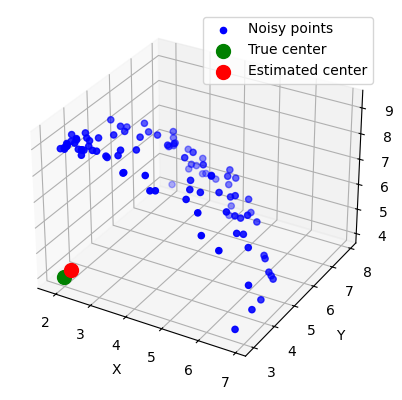

array([2.10545873, 3.14143765, 4.23383325])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to compute the center of a sphere
def find_sphere_center(points, radius):
    X = np.array([p[0] for p in points])
    Y = np.array([p[1] for p in points])
    Z = np.array([p[2] for p in points])
    
    A = np.c_[2*X, 2*Y, 2*Z, np.ones(len(X))]
    B = X**2 + Y**2 + Z**2 - radius**2
    
    coeff, *_ = np.linalg.lstsq(A, B, rcond=None)
    Cx, Cy, Cz, _ = coeff
    
    return np.array([Cx, Cy, Cz])

# Generate random points on a sphere with added noise
def generate_noisy_sphere_points(center, radius, num_points, noise_level=0.05):
    points = []
    for _ in range(num_points):
        # Random spherical coordinates
        theta = np.random.uniform(0, 0.5 * np.pi)
        phi = np.random.uniform(0, 0.5*np.pi)
        
        # Convert to Cartesian coordinates
        x = center[0] + radius * np.sin(phi) * np.cos(theta)
        y = center[1] + radius * np.sin(phi) * np.sin(theta)
        z = center[2] + radius * np.cos(phi)
        
        # Add noise
        x += np.random.normal(0, noise_level)
        y += np.random.normal(0, noise_level)
        z += np.random.normal(0, noise_level)
        
        points.append([x, y, z])
    return points

# Known center and radius of the sphere
true_center = np.array([2.0, 3.0, 4.0])
true_radius = 5.0

# Generate points
num_points = 100
noise_level = 0.1
points = generate_noisy_sphere_points(true_center, true_radius, num_points, noise_level)

# Find the center of the sphere from the noisy points
print(np.array(points).shape)
estimated_center = find_sphere_center(points, true_radius)

# Visualization of the points and the estimated center
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the noisy points
points = np.array(points)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', label='Noisy points')

# Plot the true and estimated centers
ax.scatter(*true_center, color='green', s=100, label='True center')
ax.scatter(*estimated_center, color='red', s=100, label='Estimated center')

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

estimated_center



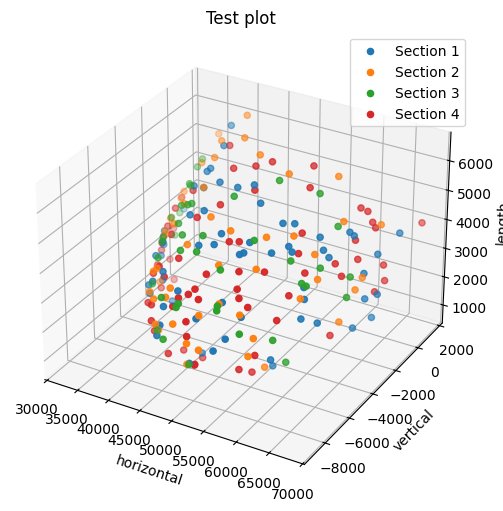

In [3]:
import requests
import numpy as np
import matplotlib.pyplot as plt

sections = requests.get("http://localhost:8000/data/get-dummysections").json()

point_calc = []

for section in sections:
    if section.get("name").find("newpen-top-random-332-mm-2-") ==0 :
        points = section.get("points")
        point_disp = []
        for point in points:
            h = point.get("h")
            v = point.get("v")
            l = point.get("l")
            point_disp.append([h,v,l])
        point_calc.append(point_disp)

#point_arr = np.array(point_calc)
#print(point_arr)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


for i, section in enumerate(point_calc):
    section = np.array(section)
    x, y, z = section[:, 0], section[:, 1], section[:, 2]
    ax.scatter(x, y, z, marker='o', label=f'Section {i+1}')

# Labels and title
ax.set_xlabel('horizontal')
ax.set_ylabel('vertical')
ax.set_zlabel('length')
ax.set_title('Test plot')

# Display legend
ax.legend()

# Show the plot
plt.show()

In [4]:
HORIZONTAL_MAX = 228000
VERTICAL_MAX = 228000
LENGTH_MAX = 32767
LENGTH_MAX_VALUE_MM = 1830 # without offset

LENGTH_V_OFFSET = 8530

LENGTH_OFFSET = 155+35+3

HEIGHT_OFFSET = 0

ll = np.arange(100,2100,100)+ LENGTH_OFFSET

fll = np.array([
    2904,4247,5584,6906,
    8274,9595,10918,
    12255,13643,14934,
    16269,17607,18966,
    20315,21638,22960,
    24299,25652,26960,
    28298
])

fll = fll- (2904-74)

res = np.polyfit(fll,ll,1)
p = np.poly1d(res)

def convert_to_xyz(h, v, l):
    # Normalize h and v to radians between 0 and 2π using numpy
    h_angle = (h % HORIZONTAL_MAX) * (2 * np.pi / HORIZONTAL_MAX)
    v_angle = (v % VERTICAL_MAX) * (2 * np.pi / VERTICAL_MAX)

    v_angle += np.pi/2
    r = p(l)
    # Convert spherical to Cartesian coordinates
    x = r * np.sin(v_angle) * np.cos(h_angle)
    y = r * np.sin(v_angle) * np.sin(h_angle)
    z = r * np.cos(v_angle)
    

    return x, y, z

In [5]:
RADIUS = 332

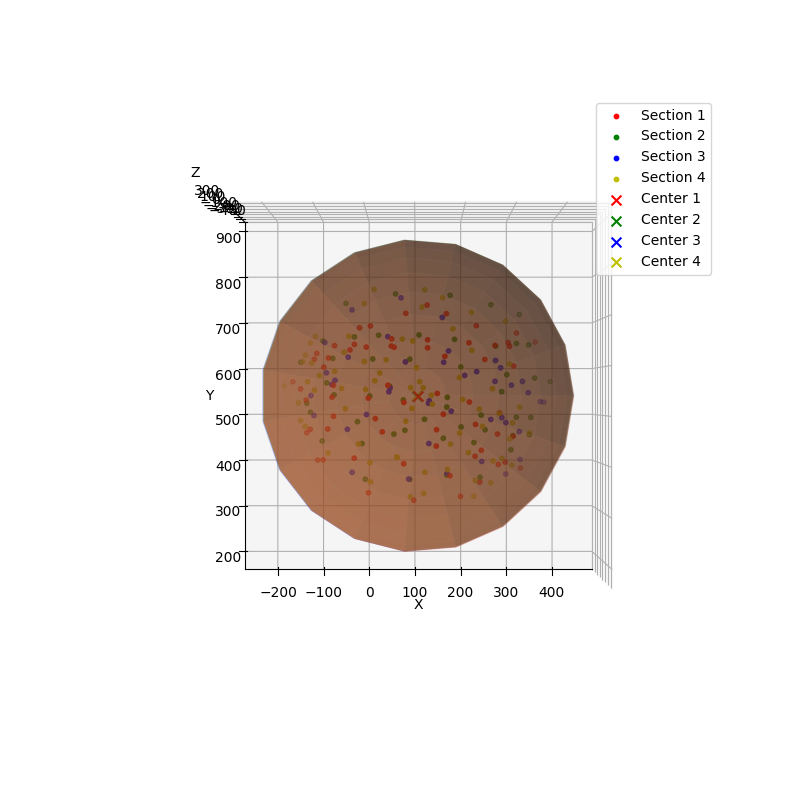

In [6]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

data_cartesian = []
for section in point_calc:
    section_cartesian = [convert_to_xyz(h, v, l) for h, v, l in section]
    data_cartesian.append(section_cartesian)

#data_np = np.array(data_cartesian)

centers = []

for meas in data_cartesian:
    #print(meas.shape)
    est_center = find_sphere_center(meas, RADIUS)
    centers.append(est_center)

# Plot the Cartesian coordinates for each section
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each section as a scatter plot
colors = ['r', 'g', 'b', 'y', 'bl']
for i, section in enumerate(data_cartesian):
    section = np.array(section)
    x, y, z = section[:, 0], section[:, 1], section[:, 2]
    ax.scatter(x, y, z, color=colors[i % len(colors)], label=f'Section {i+1}', s=10)

# Plot centers and spheres
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi/2, 10)

for i, center in enumerate(centers):
    center = np.array(center)
    x, y, z = center[0], center[1], center[2]
    ax.scatter(x, y, z, color=colors[i % len(colors)], label=f'Center {i+1}', s=50, marker="x")
    
    # Sphere coordinates
    sphere_x = RADIUS * np.outer(np.cos(u), np.sin(v)) + x
    sphere_y = RADIUS * np.outer(np.sin(u), np.sin(v)) + y
    sphere_z = RADIUS * np.outer(np.ones(np.size(u)), np.cos(v)) + z
    
    # Plot the sphere with transparency
    ax.plot_surface(sphere_x, sphere_y, sphere_z, color=colors[i % len(colors)], alpha=0.3, linewidth=0)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Equal aspect ratio
ax.set_box_aspect([1, 1, 1])

# Adjust view angle
ax.view_init(elev=90, azim=-90, roll=0)

# Show legend
ax.legend()

def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

set_axes_equal(ax)

# Show the plot
plt.show()


In [7]:
centers

[array([ 106.52972237,  540.03333986, -196.83562525]),
 array([ 105.53628664,  540.81391508, -199.922995  ]),
 array([ 103.74051999,  540.82702057, -200.63292619]),
 array([ 105.21691188,  541.41471701, -197.7238447 ])]